In [279]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
X

In [280]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


from matplotlib import pyplot as plt
import seaborn as sns
y.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

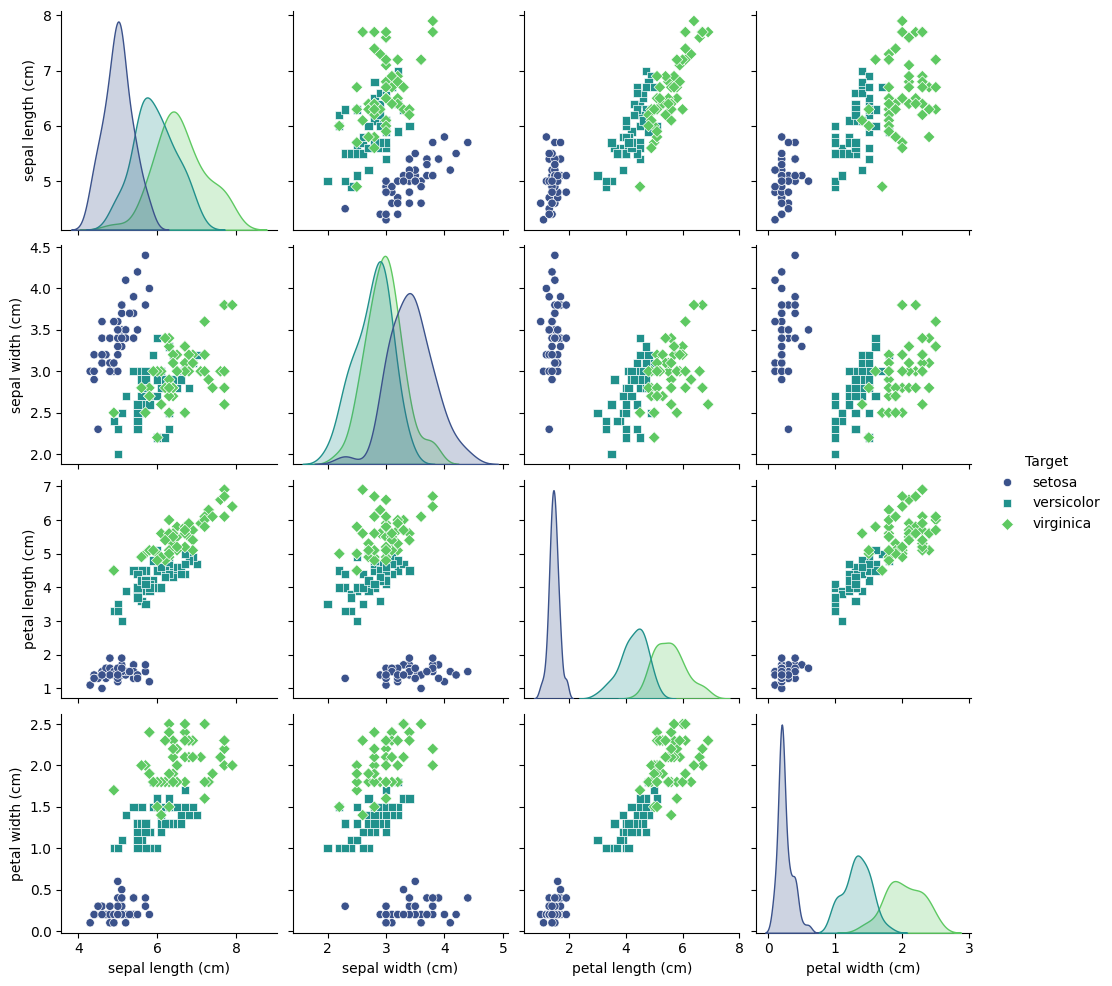

In [281]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Convert to pandas DataFrame for easier plotting
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['Target'] = iris.target_names[y]

# Pairplot for all pairs of features
sns.pairplot(df, hue='Target', markers=["o", "s", "D"], palette="viridis")
plt.show()

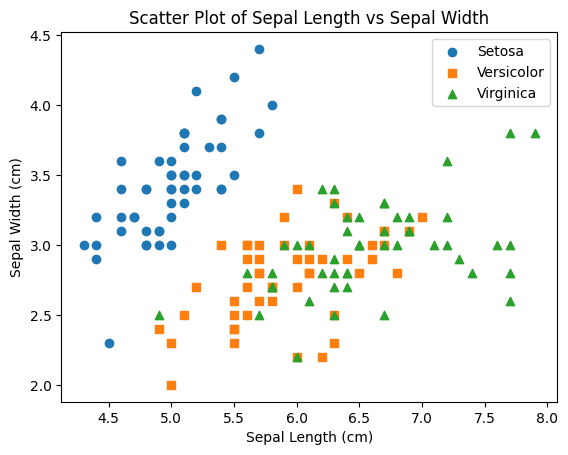

In [282]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the features and targets
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Target'] = iris.target

# Scatter plot for two features
plt.scatter(data['sepal length (cm)'][data['Target'] == 0], data['sepal width (cm)'][data['Target'] == 0], label='Setosa', marker='o')
plt.scatter(data['sepal length (cm)'][data['Target'] == 1], data['sepal width (cm)'][data['Target'] == 1], label='Versicolor', marker='s')
plt.scatter(data['sepal length (cm)'][data['Target'] == 2], data['sepal width (cm)'][data['Target'] == 2], label='Virginica', marker='^')


plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

plt.legend()
plt.show()


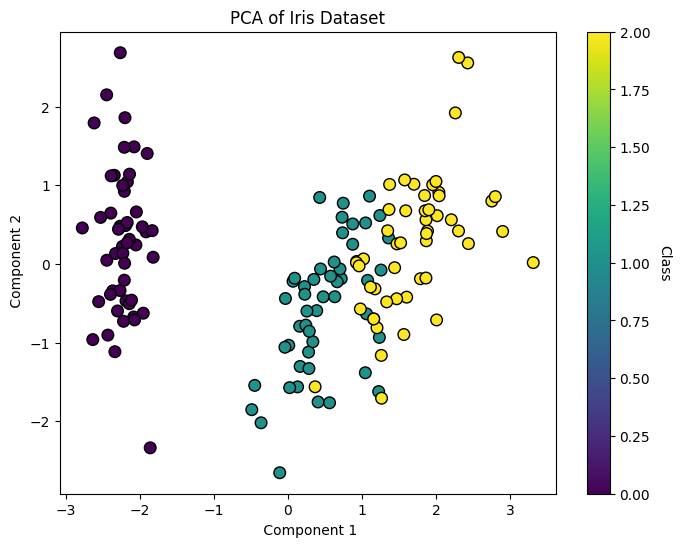

In [283]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
df_normalized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_normalized)
plt.figure(figsize=(8, 6))

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# colors = ["g.", "r.", "c."]

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', edgecolors='k', s=70)
plt.title('PCA of Iris Dataset')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')

# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Class', rotation=270, labelpad=15)

plt.show()

Initialize a population

In [286]:
import numpy as np

def initialize_population(population_size, num_data_points, num_classes):
    population = []

    for _ in range(population_size):
        # Generate a random chromosome for each individual in the population
        chromosome = np.random.randint(0, num_classes, num_data_points)
        chromosome = np.append(chromosome, num_classes)

        # Append the chromosome to the population
        population.append(chromosome)

    return population


population_size = 30
num_data_points = 150
num_classes = 3
initial_population = initialize_population(population_size, num_data_points, num_classes)


for i, chromosome in enumerate(initial_population):
    print(f"Chromosome {i + 1}: {chromosome}")


Chromosome 1: [1 1 2 1 2 2 1 2 1 0 0 1 1 1 2 0 1 2 0 1 2 2 2 2 0 1 1 2 1 0 1 1 1 1 0 1 1
 2 0 0 0 1 2 2 1 2 2 1 2 0 1 2 1 1 2 1 1 0 0 2 0 2 2 2 0 1 1 0 2 2 0 1 1 0
 0 2 1 1 0 0 1 0 2 0 1 1 2 2 0 1 2 0 0 0 2 0 2 1 0 2 2 1 1 0 0 2 1 2 2 0 2
 0 0 0 2 0 1 2 0 1 2 2 0 2 2 1 0 0 2 0 1 1 2 0 0 0 1 1 1 0 0 0 0 0 2 0 0 2
 2 2 3]
Chromosome 2: [2 1 0 1 2 0 0 1 1 0 0 1 1 1 1 2 2 0 1 2 1 1 2 0 0 2 0 1 1 1 0 2 1 1 2 1 2
 0 0 2 1 0 1 1 1 2 1 2 2 2 1 2 0 0 2 2 2 1 1 1 0 1 1 0 2 2 1 1 1 0 1 2 2 1
 2 0 1 2 2 1 2 1 0 2 2 1 2 0 0 2 1 0 1 2 1 0 2 1 0 0 2 2 2 0 2 0 2 1 2 2 1
 1 0 0 1 1 0 2 0 2 2 1 0 0 0 0 1 0 2 2 0 1 2 2 2 1 2 2 1 0 1 1 2 1 1 1 0 1
 2 2 3]
Chromosome 3: [2 0 2 2 1 1 2 0 2 2 2 0 1 1 1 2 0 2 2 2 0 1 0 1 0 2 0 0 2 1 0 0 2 2 2 2 1
 0 0 1 1 0 1 2 2 0 2 0 1 0 1 1 1 2 0 1 1 0 2 2 2 2 0 1 2 2 1 1 1 1 0 2 0 0
 2 1 2 1 1 0 1 2 2 2 1 1 0 0 0 0 2 2 0 1 0 2 2 0 1 2 0 0 1 2 2 1 2 0 1 0 2
 1 2 2 2 2 1 0 1 1 2 1 2 0 1 2 1 1 1 1 2 2 2 0 2 1 2 2 1 1 2 1 1 1 0 1 0 0
 2 1 3]
Chromosome 4: [2 2 1 0 2 2 0 2 2 0

cross over

In [287]:
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 2)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

    return child1, child2

# child1, child2 = crossover(initial_population[1], initial_population[2])


mutation

In [288]:


def mutation(chromosome):

    mutation_indices = np.random.choice(len(chromosome)-2, 2, replace=False)
    # print(mutation_indices)
    # Swap values at the chosen indices
    mutated_chromosome = chromosome.copy()
    mutated_chromosome[mutation_indices[0]], mutated_chromosome[mutation_indices[1]] = (
        mutated_chromosome[mutation_indices[1]],
        mutated_chromosome[mutation_indices[0]],
    )

    return mutated_chromosome


# mutated_chromosome = mutation(initial_population[1])

# # Print the results
# print("Original Chromosome:", initial_population[1])
# print("Mutated Chromosome:", mutated_chromosome)


Objective function

In [289]:
from sklearn.metrics import adjusted_rand_score

def evaluate_clustering( true_labels, predicted_labels):

    ari = adjusted_rand_score(true_labels, predicted_labels[:150])
    return ari

# ari = evaluate_clustering(y_encoded,initial_population[3])
# print("Adjusted Rand Index:", ari)



10 generation

In [290]:
# Main genetic algorithm loop

mutation_probability = 0.4
cross_probability=0.9
best_solution = None
best_fitness = float('-inf')
while(best_fitness<0.96):

    fitness_scores = []
    for chromosome in initial_population:
        ari = evaluate_clustering(data['Target'], chromosome)
        fitness_scores.append(ari)

    # Sort population based on fitness scores
    sorted_indices = np.argsort(fitness_scores)
    initial_population = [initial_population[i] for i in sorted_indices]

    num_crossover = int(0.8 * population_size)
    crossover_pairs = np.random.choice(population_size, size=(num_crossover // 2, 2), replace=False)

    # Perform crossover on the selected pairs
    i=0
    for pair in crossover_pairs:
        parent1 = initial_population[pair[0]]
        parent2 = initial_population[pair[1]]
        if np.random.rand() < cross_probability:
            child1, child2 = crossover(parent1, parent2)
            initial_population[i+0] = child1
            initial_population[i+1] = child2
            i+=2

    num_mutation = int(0.1 * population_size)
    mutation_indices = np.random.choice(population_size, size=num_mutation, replace=False)

    # Perform mutation on the selected individuals
    for index in mutation_indices:
         if np.random.rand() < mutation_probability:
              initial_population[index] = mutation(initial_population[index])



    fitness_values = [evaluate_clustering(y_encoded, chromosome) for chromosome in initial_population]
    current_best_fitness = max(fitness_values)

    if current_best_fitness > best_fitness:
        best_solution = initial_population[np.argmax(fitness_values)]
        best_fitness = current_best_fitness

print(f"Best Solution: {best_solution}")
print(f"Best Fitness: {best_fitness}")
# The final population represents the solution after the specified number of generations
final_population = initial_population

Best Solution: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3]
Best Fitness: 0.9602776916338867


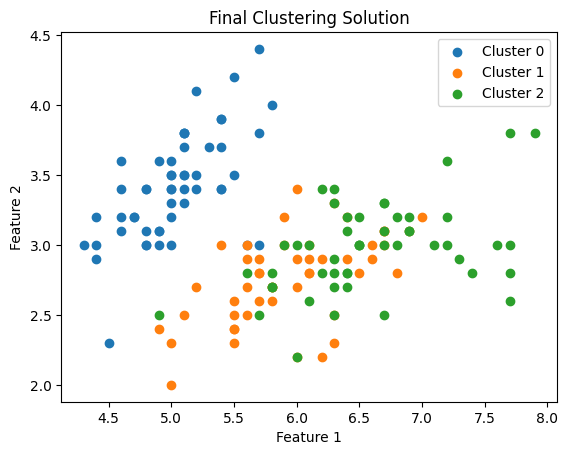

In [291]:


import matplotlib.pyplot as plt
import numpy as np
best_cluster_assignments = best_solution[:-1]
for cluster in range(0, int(np.max(best_cluster_assignments)) + 1):
    cluster_points = X[best_cluster_assignments == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Final Clustering Solution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


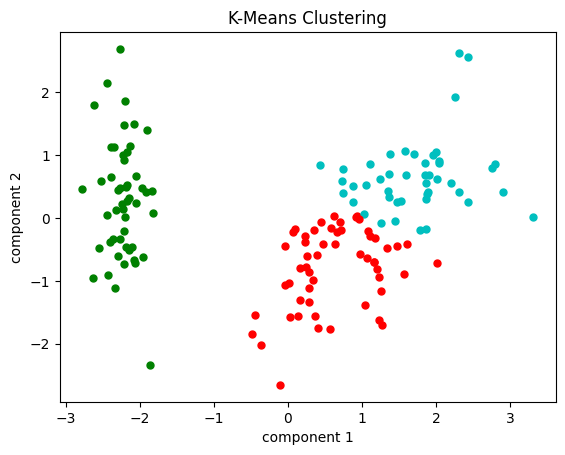

In [272]:

from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3)
kmeans = Kmeans.fit(X_pca)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.", "r.", "c."]
for i in range(len(X_pca)):
    plt.plot(X_pca[i][0], X_pca[i][1], colors[labels[i]], markersize=10)

plt.title("K-Means Clustering")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [278]:
kmeans1 = KMeans(n_clusters=3)
predicted_labels = kmeans1.fit_predict(X)
ari = adjusted_rand_score(data['Target'], predicted_labels)
ari

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7302382722834697